### 1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'\workspace\HR.csv')

In [4]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


1. mean - среднее значение столбца
2. 50% - медиана значений столбца
3. std -  среднеквадратическое отклонение
4. min - минимальное значение столбца
5. max - максимальное значение столбца

6. расчет моды для столбцов с числовыми значениями

In [147]:
def moda(df):
    dic_val = {}
    for w in df.round():
        if w not in dic_val:
            dic_val[w] = 1
        else:
            dic_val[w] += 1

    qty = 0
    value = None
    for k, v in dic_val.items():
        if qty < v:
            qty = v
            value = k
    return f'Мода - {value}'

In [148]:
data_moda = data.iloc[:, 0:8]
data_moda.apply(moda)

satisfaction_level       Мода - 1.0
last_evaluation          Мода - 1.0
number_project             Мода - 4
average_montly_hours     Мода - 135
time_spend_company         Мода - 3
Work_accident              Мода - 0
left                       Мода - 0
promotion_last_5years      Мода - 0
dtype: object

### 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_moda.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


<AxesSubplot:>

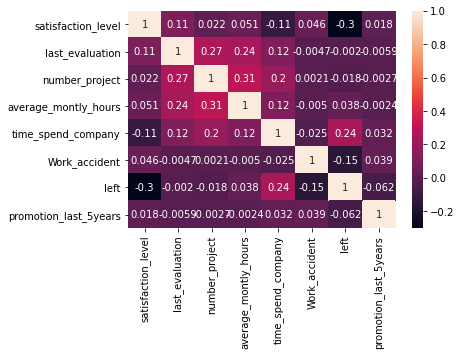

In [40]:
sns.heatmap(data_moda.corr(method='kendall'), annot= True)

Таким образом, наибольший коээфициент коррелляции (0.306987) имеют переменные столбцов "number_projects" (Количество проектов, выполненных за время работы) и "average_monthly_hours" (Среднее количество часов на рабочем месте в месяц).
Наименьший коэффициента корреляции (-0.002010) имеют переменные столбцов "Last_evaluation" (Время с момента последней оценки в годах) и "left" (уволился ли сотрудник)


### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [53]:
data.salary.groupby(data.department).count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

### 5. Показать распределение сотрудников по зарплатам 

In [31]:
import matplotlib.pyplot as plt

In [34]:
data_salary = data.groupby(['salary']).count().rename(columns={'satisfaction_level': 'quantity'})[['quantity']]

In [39]:
data_salary

,quantity
salary,
high,1237
low,7316
medium,6446


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам '}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

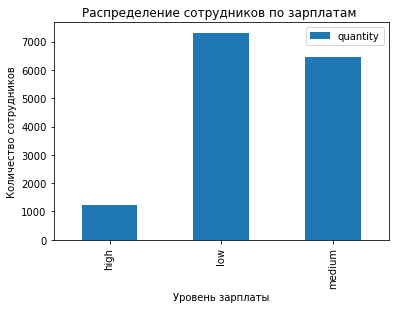

In [49]:
data_salary.plot(kind = 'bar', title='Распределение сотрудников по зарплатам ',  
              xlabel='Уровень зарплаты', ylabel='Количество сотрудников')

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [40]:
data_dep_sal = data.groupby(['department', 'salary']).count().rename(columns={'satisfaction_level': 'quantity'})[['quantity']]

In [62]:
data_dep_sal

quantity
department  salary          
IT          high          83
            low          609
            medium       535
RandD       high          51
            low          364
            medium       372
accounting  high          74
            low          358
            medium       335
hr          high          45
            low          335
            medium       359
management  high         225
            low          180
            medium       225
marketing   high          80
            low          402
            medium       376
product_mng high          68
            low          451
            medium       383
sales       high         269
            low         2099
            medium      1772
support     high         141
            low         1146
            medium       942
technical   high         201
            low         1372
            medium      1147

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам в каждом департаменте'}, xlabel='Департамент, уровень зарплаты', ylabel='Количество сотрудников'>

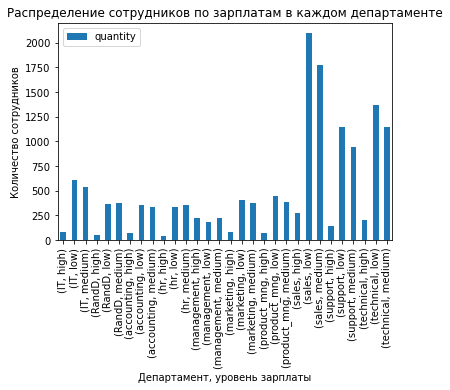

In [48]:
data_dep_sal.plot(kind = 'bar', title='Распределение сотрудников по зарплатам в каждом департаменте',  
              xlabel='Департамент, уровень зарплаты', ylabel='Количество сотрудников')

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [1]:
from scipy import stats

Н0: сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом

Н1: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [30]:
alpha = 0.05
result = stats.ttest_ind(high_sal['average_montly_hours'], low_sal['average_montly_hours'], equal_var=False)
if result.pvalue < alpha:
    print (f' P-value = {result.pvalue}. Отвергаем нулевую гипотезу. Cотрудники проводят на работе разное количество времени')
else: print (f' P-value = {result.pvalue}. Не отвергаем нулевую гипотезу')
    

 P-value = 0.4459045542257889. Не отвергаем нулевую гипотезу


Значение p-value больше уровня значимости α, в связи с чем оснований отвергать нулевую гипотезу (сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом) нет.

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [85]:
# Доля сотрудников с повышением за последние 5 лет
obj = data.groupby(['left']).count()
obj['proportion'] =  (obj['satisfaction_level'] / obj['satisfaction_level'].sum())*100
obj[['proportion']]

,proportion
left,
0,76.191746
1,23.808254


In [87]:
# Средняя степень удовлетворенности
data.groupby(['left']).mean()[['satisfaction_level']]

,satisfaction_level
left,
0,0.666810
1,0.440098


In [71]:
# Среднее количество проектов
data.groupby(['left']).mean()[['number_project']]

,number_project
left,
0,3.786664
1,3.855503


### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [49]:
lda_data = data.iloc[:,:8].drop(columns=['left'])
lda_pr = data['left'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(lda_data, lda_pr, test_size=0.25)

In [59]:
lda = LinearDiscriminantAnalysis()

In [60]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [61]:
lda.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [62]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,0
1,1,0
2,0,1
3,0,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,1
3748,1,1


In [63]:
accuracy_score(y_test, lda.predict(X_test))

0.756

Таким образом, точность модели составляет около 76 %, что позволяет сделать о достаточно хорошем качестве модели